In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [7]:
label_dict = {"유형":{"사실형":0, "추론형":1, "대화형":2, "예측형":3}, "극성":{"긍정":0, "부정":1, "미정":2}, "시제":{"과거":0, "현재":1, "미래":2}, "확실성":{"확실":0, "불확실":1}}

In [8]:
df = pd.read_csv('dataset/train.csv')

In [9]:
for label in label_dict:
  for i in range(len(df)):
    df[label].iloc[i] = label_dict[label][df[label].iloc[i]]
df

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,0,0,1,0,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,0,0,0,0,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,0,0,2,0,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",0,0,0,0,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,0,0,1,0,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",0,0,0,0,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",0,0,0,0,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,0,0,0,0,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,0,0,0,1,사실형-긍정-과거-불확실


In [10]:
print(df["유형"].value_counts(), df["극성"].value_counts(), df["시제"].value_counts(), df["확실성"].value_counts(), sep="\n")

0    13558
1     2151
2      575
3      257
Name: 유형, dtype: int64
0    15793
1      565
2      183
Name: 극성, dtype: int64
0    8032
1    6866
2    1643
Name: 시제, dtype: int64
0    15192
1     1349
Name: 확실성, dtype: int64


In [11]:
df[df['극성']==2]

,ID,문장,유형,극성,시제,확실성,label
45,TRAIN_00045,"＇월드 오브 드래곤네스트＇는 오는 8일 말레이시아, 싱가포르, 인도네시아, 필리핀,...",0,2,1,0,사실형-미정-현재-확실
147,TRAIN_00147,해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.,3,2,2,1,예측형-미정-미래-불확실
244,TRAIN_00244,LAH는 에어버스헬리콥터의 H155B1 플랫폼을 기반으로 최신 항전장비와 무장사격통...,0,2,2,0,사실형-미정-미래-확실
431,TRAIN_00431,＂확진 임신부가 태아나 신생아에게 코로나를 전염시킬 수 있나?＂,2,2,2,1,대화형-미정-미래-불확실
436,TRAIN_00436,최대 8인의 전투부대를 구성해 지옥성물함 공격대 우두머리에 도전할 수 있으며 150...,1,2,2,1,추론형-미정-미래-불확실
...,...,...,...,...,...,...,...
16279,TRAIN_16279,반도체 업체 넥스트칩이 내달 1일 코스닥 상장을 위해 16일부터 이틀 간 기관투자자...,0,2,2,0,사실형-미정-미래-확실
16294,TRAIN_16294,핵무기로 세상을 위협하는 북한이 가장 두려워하는 것이 뭘까?,2,2,1,1,대화형-미정-현재-불확실
16348,TRAIN_16348,공짜로 돈을 나눠주겠다는 데 반대할 도민이 과연 있을까.,2,2,1,1,대화형-미정-현재-불확실
16406,TRAIN_16406,전투기에 장착되는 다양한 유도무기 중에 아군의 피해 없이 원거리에서 지상에 있는 적...,0,2,2,0,사실형-미정-미래-확실


In [12]:
print(df[df['극성']==2]["유형"].value_counts(), df[df['극성']==2]["극성"].value_counts(), df[df['극성']==2]["시제"].value_counts(), df[df['극성']==2]["확실성"].value_counts(), sep="\n")

0    75
2    64
1    29
3    15
Name: 유형, dtype: int64
2    183
Name: 극성, dtype: int64
2    105
1     63
0     15
Name: 시제, dtype: int64
1    127
0     56
Name: 확실성, dtype: int64


In [13]:
sorted(df['label'].unique())

['대화형-긍정-과거-불확실',
 '대화형-긍정-과거-확실',
 '대화형-긍정-미래-불확실',
 '대화형-긍정-미래-확실',
 '대화형-긍정-현재-불확실',
 '대화형-긍정-현재-확실',
 '대화형-미정-과거-불확실',
 '대화형-미정-과거-확실',
 '대화형-미정-미래-불확실',
 '대화형-미정-미래-확실',
 '대화형-미정-현재-불확실',
 '대화형-부정-과거-불확실',
 '대화형-부정-과거-확실',
 '대화형-부정-미래-확실',
 '대화형-부정-현재-불확실',
 '대화형-부정-현재-확실',
 '사실형-긍정-과거-불확실',
 '사실형-긍정-과거-확실',
 '사실형-긍정-미래-불확실',
 '사실형-긍정-미래-확실',
 '사실형-긍정-현재-불확실',
 '사실형-긍정-현재-확실',
 '사실형-미정-과거-확실',
 '사실형-미정-미래-불확실',
 '사실형-미정-미래-확실',
 '사실형-미정-현재-불확실',
 '사실형-미정-현재-확실',
 '사실형-부정-과거-불확실',
 '사실형-부정-과거-확실',
 '사실형-부정-미래-불확실',
 '사실형-부정-미래-확실',
 '사실형-부정-현재-불확실',
 '사실형-부정-현재-확실',
 '예측형-긍정-과거-불확실',
 '예측형-긍정-과거-확실',
 '예측형-긍정-미래-불확실',
 '예측형-긍정-미래-확실',
 '예측형-긍정-현재-불확실',
 '예측형-긍정-현재-확실',
 '예측형-미정-과거-확실',
 '예측형-미정-미래-불확실',
 '예측형-미정-미래-확실',
 '예측형-미정-현재-불확실',
 '예측형-미정-현재-확실',
 '예측형-부정-과거-확실',
 '예측형-부정-미래-불확실',
 '예측형-부정-현재-불확실',
 '추론형-긍정-과거-불확실',
 '추론형-긍정-과거-확실',
 '추론형-긍정-미래-불확실',
 '추론형-긍정-미래-확실',
 '추론형-긍정-현재-불확실',
 '추론형-긍정-현재-확실',
 '추론형-미정-과거-불확실',
 '추론형-미정-미래-불확실',
 '추론형-미정-미래-확실',
 '추론형-미정-현재-불확실',
 '

In [14]:
len(df['label'].unique())

64

In [15]:
le = LabelEncoder()
le.fit(df['label'])
df['target'] = le.transform(df['label'])
df

,ID,문장,유형,극성,시제,확실성,label,target
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,0,0,1,0,사실형-긍정-현재-확실,21
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,0,0,0,0,사실형-긍정-과거-확실,17
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,0,0,2,0,사실형-긍정-미래-확실,19
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",0,0,0,0,사실형-긍정-과거-확실,17
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,0,0,1,0,사실형-긍정-현재-확실,21
...,...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",0,0,0,0,사실형-긍정-과거-확실,17
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",0,0,0,0,사실형-긍정-과거-확실,17
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,0,0,0,0,사실형-긍정-과거-확실,17
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,0,0,0,1,사실형-긍정-과거-불확실,16


In [16]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.ylim(0, 50)
    plt.show()

Class=21, n=4743 (28.674%)
Class=17, n=7113 (43.002%)
Class=19, n=649 (3.924%)
Class=63, n=93 (0.562%)
Class=35, n=141 (0.852%)
Class=52, n=1101 (6.656%)
Class=48, n=335 (2.025%)
Class=51, n=130 (0.786%)
Class=3, n=26 (0.157%)
Class=26, n=18 (0.109%)
Class=28, n=183 (1.106%)
Class=44, n=1 (0.006%)
Class=50, n=204 (1.233%)
Class=18, n=236 (1.427%)
Class=5, n=257 (1.554%)
Class=32, n=174 (1.052%)
Class=1, n=120 (0.725%)
Class=16, n=144 (0.871%)
Class=20, n=200 (1.209%)
Class=4, n=44 (0.266%)
Class=40, n=10 (0.060%)
Class=36, n=57 (0.345%)
Class=61, n=7 (0.042%)
Class=24, n=26 (0.157%)
Class=49, n=167 (1.010%)
Class=12, n=5 (0.030%)
Class=2, n=22 (0.133%)
Class=8, n=22 (0.133%)
Class=54, n=20 (0.121%)
Class=60, n=5 (0.030%)
Class=59, n=16 (0.097%)
Class=23, n=22 (0.133%)
Class=47, n=49 (0.296%)
Class=38, n=13 (0.079%)
Class=27, n=10 (0.060%)
Class=34, n=10 (0.060%)
Class=33, n=8 (0.048%)
Class=0, n=16 (0.097%)
Class=6, n=10 (0.060%)
Class=30, n=14 (0.085%)
Class=62, n=9 (0.054%)
Class=25,

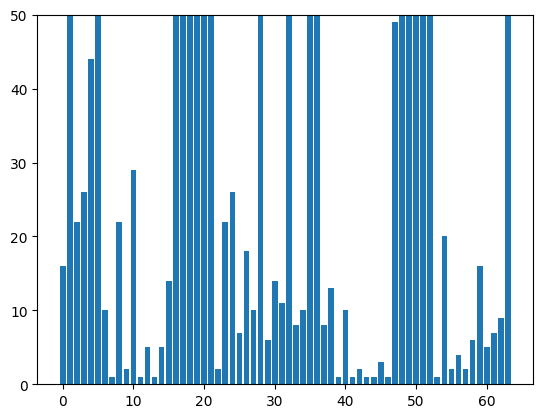

In [17]:
y = df['target']
X = df.drop(labels='target', axis=1)
count_and_plot(y)

Class=21, n=7113 (1.562%)
Class=17, n=7113 (1.562%)
Class=19, n=7113 (1.562%)
Class=63, n=7113 (1.562%)
Class=35, n=7113 (1.562%)
Class=52, n=7113 (1.562%)
Class=48, n=7113 (1.562%)
Class=51, n=7113 (1.562%)
Class=3, n=7113 (1.562%)
Class=26, n=7113 (1.562%)
Class=28, n=7113 (1.562%)
Class=44, n=7113 (1.562%)
Class=50, n=7113 (1.562%)
Class=18, n=7113 (1.562%)
Class=5, n=7113 (1.562%)
Class=32, n=7113 (1.562%)
Class=1, n=7113 (1.562%)
Class=16, n=7113 (1.562%)
Class=20, n=7113 (1.562%)
Class=4, n=7113 (1.562%)
Class=40, n=7113 (1.562%)
Class=36, n=7113 (1.562%)
Class=61, n=7113 (1.562%)
Class=24, n=7113 (1.562%)
Class=49, n=7113 (1.562%)
Class=12, n=7113 (1.562%)
Class=2, n=7113 (1.562%)
Class=8, n=7113 (1.562%)
Class=54, n=7113 (1.562%)
Class=60, n=7113 (1.562%)
Class=59, n=7113 (1.562%)
Class=23, n=7113 (1.562%)
Class=47, n=7113 (1.562%)
Class=38, n=7113 (1.562%)
Class=27, n=7113 (1.562%)
Class=34, n=7113 (1.562%)
Class=33, n=7113 (1.562%)
Class=0, n=7113 (1.562%)
Class=6, n=7113 (1.

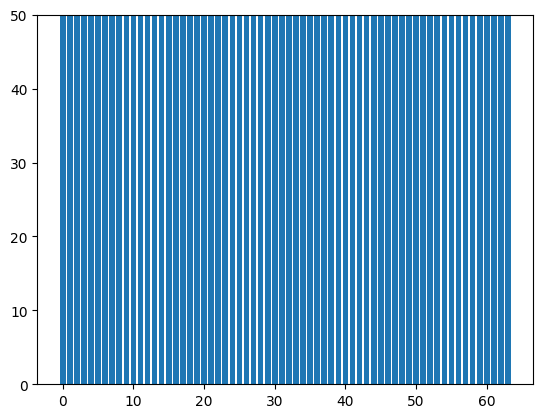

In [18]:
oversample = RandomOverSampler(random_state=0)
X_over, y_over = oversample.fit_resample(X, y)
count_and_plot(y_over)

In [19]:
X_over

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,0,0,1,0,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,0,0,0,0,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,0,0,2,0,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",0,0,0,0,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,0,0,1,0,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
455227,TRAIN_00153,＂영웅이 되어 돌아가기 위해서 온 것도 아니다.＂,1,1,1,0,추론형-부정-현재-확실
455228,TRAIN_08133,코로나19가 경제에 주는 충격을 현재 단계에서는 섣불리 가늠하기 어려울 것 같다.,1,1,1,0,추론형-부정-현재-확실
455229,TRAIN_06290,어느 정당도 ＇빽＇ 없는 서점 주인이나 치킨집 사장을 인재로 영입하지 않는다.,1,1,1,0,추론형-부정-현재-확실
455230,TRAIN_12029,지난 2019년 5월 칸국제영화제서부터 봉 감독의 통역을 도맡아 해온 최성재(샤론 ...,1,1,1,0,추론형-부정-현재-확실


In [20]:
print(X_over["유형"].value_counts(), X_over["극성"].value_counts(), X_over["시제"].value_counts(), X_over["확실성"].value_counts(), sep="\n")

0    120921
1    120921
2    113808
3     99582
Name: 유형, dtype: int64
0    170712
1    142260
2    142260
Name: 극성, dtype: int64
1    156486
2    156486
0    142260
Name: 시제, dtype: int64
0    227616
1    227616
Name: 확실성, dtype: int64


# 학습

In [21]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from konlpy.tag import Komoran
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
seed = 0
max_len = 64
batch_size = 150
warmup_ratio = 0.1
num_epochs = 1000
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [24]:
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

using cached model. /mnt/c/Users/asdzx/Documents/2212Dacon/.cache/kobert_v1.zip
using cached model. /mnt/c/Users/asdzx/Documents/2212Dacon/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [25]:
train, val, _, _ = train_test_split(X_over, X_over['label'], test_size=0.2, random_state=seed, stratify = X_over["유형"])

In [26]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /mnt/c/Users/asdzx/Documents/2212Dacon/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [27]:
class BERTDataset(Dataset):
    def __init__(self, dataset, bert_tokenizer, max_len,
                 pad, pair, train):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.train=train
        self.sentences = [transform([i]) for i in dataset["문장"]]
        if train:
          self.type_labels = [np.int32(i) for i in dataset["유형"]]
          self.polarity_labels = [np.int32(i) for i in dataset["극성"]]
          self.tense_labels = [np.int32(i) for i in dataset["시제"]]
          self.certainty_labels = [np.int32(i) for i in dataset["확실성"]]

    def __getitem__(self, i):
        if self.train:
          return (self.sentences[i] + (self.type_labels[i], self.polarity_labels[i], self.tense_labels[i], self.certainty_labels[i]))
        return (self.sentences[i],)

    def __len__(self):
        return (len(self.sentences))


In [28]:
data_train = BERTDataset(train, tok, max_len, True, False, True)
data_val = BERTDataset(val, tok, max_len, True, False, True)

In [29]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, shuffle=False, num_workers=0)

In [30]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.type_classifier = nn.Linear(hidden_size , 4)
        self.polarity_classifier = nn.Linear(hidden_size , 3)
        self.tense_classifier = nn.Linear(hidden_size , 3)
        self.certainty_classifier = nn.Linear(hidden_size , 2)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.type_classifier(out), self.polarity_classifier(out), self.tense_classifier(out), self.certainty_classifier(out)

In [31]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [32]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [33]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [34]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [35]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [36]:
def validation(model, val_loader, criterion, device):
    model.eval()
    val_loss = []
    
    type_preds, polarity_preds, tense_preds, certainty_preds = [], [], [], []
    type_labels, polarity_labels, tense_labels, certainty_labels = [], [], [], []
    
    
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, type_label, polarity_label, tense_label, certainty_label) in tqdm(enumerate(val_loader), total=len(val_loader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            type_label = type_label.long().to(device)
            polarity_label = polarity_label.long().to(device)
            tense_label = tense_label.long().to(device)
            certainty_label = certainty_label.long().to(device)
            type_logit, polarity_logit, tense_logit, certainty_logit = model(token_ids, valid_length, segment_ids)
            
            loss = 0.25 * criterion['type'](type_logit, type_label) + \
                        0.25 * criterion['polarity'](polarity_logit, polarity_label) + \
                        0.25 * criterion['tense'](tense_logit, tense_label) + \
                        0.25 * criterion['certainty'](certainty_logit, certainty_label)
            
            val_loss.append(loss.item())
            
            type_preds += type_logit.argmax(1).detach().cpu().numpy().tolist()
            type_labels += type_label.detach().cpu().numpy().tolist()
            
            polarity_preds += polarity_logit.argmax(1).detach().cpu().numpy().tolist()
            polarity_labels += polarity_label.detach().cpu().numpy().tolist()
            
            tense_preds += tense_logit.argmax(1).detach().cpu().numpy().tolist()
            tense_labels += tense_label.detach().cpu().numpy().tolist()
            
            certainty_preds += certainty_logit.argmax(1).detach().cpu().numpy().tolist()
            certainty_labels += certainty_label.detach().cpu().numpy().tolist()
    
    type_f1 = f1_score(type_labels, type_preds, average='weighted')
    polarity_f1 = f1_score(polarity_labels, polarity_preds, average='weighted')
    tense_f1 = f1_score(tense_labels, tense_preds, average='weighted')
    certainty_f1 = f1_score(certainty_labels, certainty_preds, average='weighted')
    
    return np.mean(val_loss), type_f1, polarity_f1, tense_f1, certainty_f1

In [37]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):

  log_df = {"train_losses":[], "val_losses":[], "type_f1s":[], "polarity_f1s":[], "tense_f1s":[], "certainty_f1s":[]}

  for e in range(num_epochs):

      criterion = {
          'type' : nn.CrossEntropyLoss().to(device),
          'polarity' : nn.CrossEntropyLoss().to(device),
          'tense' : nn.CrossEntropyLoss().to(device),
          'certainty' : nn.CrossEntropyLoss().to(device)
      }

      model.train()
      train_loss = []
      for batch_id, (token_ids, valid_length, segment_ids, type_labels, polarity_labels, tense_labels, certainty_labels) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
          optimizer.zero_grad()
          token_ids = token_ids.long().to(device)
          segment_ids = segment_ids.long().to(device)
          valid_length = valid_length
          type_labels = type_labels.long().to(device)
          polarity_labels = polarity_labels.long().to(device)
          tense_labels = tense_labels.long().to(device)
          certainty_labels = certainty_labels.long().to(device)
          out = model(token_ids, valid_length, segment_ids)

          loss = 0.25 * criterion['type'](out[0], type_labels) + \
                      0.25 * criterion['polarity'](out[1], polarity_labels) + \
                      0.25 * criterion['tense'](out[2], tense_labels) + \
                      0.25 * criterion['certainty'](out[3], certainty_labels)
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
          optimizer.step()
          scheduler.step()  # Update learning rate schedule
          train_loss.append(loss.item())

      model.eval()
      val_loss, type_f1, polarity_f1, tense_f1, certainty_f1 = validation(model, val_loader, criterion, device)
      print(f'Epoch : [{e}] Train Loss : [{np.mean(train_loss):.5f}] Val Loss : [{val_loss:.5f}] 유형 F1 : [{type_f1:.5f}] 극성 F1 : [{polarity_f1:.5f}] 시제 F1 : [{tense_f1:.5f}] 확실성 F1 : [{certainty_f1:.5f}]')
      
      log_df["val_losses"].append(val_loss)
      log_df["train_losses"].append(np.mean(train_loss))
      log_df["type_f1s"].append(type_f1)
      log_df["polarity_f1s"].append(polarity_f1)
      log_df["tense_f1s"].append(tense_f1)
      log_df["certainty_f1s"].append(certainty_f1)

      pd.DataFrame(log_df).to_csv('log/log.csv')
      torch.save(model.state_dict(), f"saved_models/model_state_dict{str(e+1).zfill(4)}.pth")

  return model

In [33]:
infer_model = train(model, optimizer, train_dataloader, val_dataloader, scheduler, device)

  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [0] Train Loss : [1.02965] Val Loss : [0.86332] 유형 F1 : [0.69634] 극성 F1 : [0.69434] 시제 F1 : [0.68253] 확실성 F1 : [0.66003]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [1] Train Loss : [0.64237] Val Loss : [0.36651] 유형 F1 : [0.91526] 극성 F1 : [0.96480] 시제 F1 : [0.93371] 확실성 F1 : [0.90747]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [2] Train Loss : [0.25223] Val Loss : [0.12487] 유형 F1 : [0.96756] 극성 F1 : [0.99410] 시제 F1 : [0.97759] 확실성 F1 : [0.97129]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [3] Train Loss : [0.09387] Val Loss : [0.04464] 유형 F1 : [0.98862] 극성 F1 : [0.99781] 시제 F1 : [0.99070] 확실성 F1 : [0.99108]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [4] Train Loss : [0.03834] Val Loss : [0.01824] 유형 F1 : [0.99431] 극성 F1 : [0.99907] 시제 F1 : [0.99433] 확실성 F1 : [0.99752]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [5] Train Loss : [0.01856] Val Loss : [0.01473] 유형 F1 : [0.99570] 극성 F1 : [0.99951] 시제 F1 : [0.99605] 확실성 F1 : [0.99478]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [6] Train Loss : [0.01046] Val Loss : [0.00737] 유형 F1 : [0.99796] 극성 F1 : [0.99965] 시제 F1 : [0.99656] 확실성 F1 : [0.99898]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [7] Train Loss : [0.00674] Val Loss : [0.00691] 유형 F1 : [0.99817] 극성 F1 : [0.99963] 시제 F1 : [0.99696] 확실성 F1 : [0.99878]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [8] Train Loss : [0.00465] Val Loss : [0.00562] 유형 F1 : [0.99859] 극성 F1 : [0.99973] 시제 F1 : [0.99740] 확실성 F1 : [0.99902]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [9] Train Loss : [0.00358] Val Loss : [0.00590] 유형 F1 : [0.99801] 극성 F1 : [0.99978] 시제 F1 : [0.99740] 확실성 F1 : [0.99941]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [10] Train Loss : [0.00277] Val Loss : [0.00419] 유형 F1 : [0.99920] 극성 F1 : [0.99977] 시제 F1 : [0.99810] 확실성 F1 : [0.99934]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [11] Train Loss : [0.00239] Val Loss : [0.00634] 유형 F1 : [0.99825] 극성 F1 : [0.99975] 시제 F1 : [0.99812] 확실성 F1 : [0.99881]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [12] Train Loss : [0.00211] Val Loss : [0.00609] 유형 F1 : [0.99880] 극성 F1 : [0.99976] 시제 F1 : [0.99778] 확실성 F1 : [0.99901]


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

Epoch : [13] Train Loss : [0.00182] Val Loss : [0.00589] 유형 F1 : [0.99881] 극성 F1 : [0.99987] 시제 F1 : [0.99729] 확실성 F1 : [0.99932]


  0%|          | 0/2427 [00:00<?, ?it/s]

KeyboardInterrupt: 

# TEST

In [38]:
pretrained_dict = torch.load(r'saved_models/model_state_dict0010.pth')
model.load_state_dict(pretrained_dict)
infer_model = model

In [48]:
data_test = BERTDataset(val, tok, max_len, True, False, train=False)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, shuffle=False, num_workers=0)

# test = pd.read_csv('dataset/test.csv')

# data_test = BERTDataset(test, tok, max_len, True, False, train=False)
# test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, shuffle=False, num_workers=0)

In [49]:
def inference(infer_model, test_dataloader, device):
    infer_model.to(device)
    infer_model.eval()
    
    type_preds, polarity_preds, tense_preds, certainty_preds = [], [], [], []
    
    with torch.no_grad():
      for batch_id, i in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        token_ids, valid_length, segment_ids = i[0][0], i[0][1], i[0][2]
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        type_logit, polarity_logit, tense_logit, certainty_logit = model(token_ids, valid_length, segment_ids)
        
        type_preds += type_logit.argmax(1).detach().cpu().numpy().tolist()
        polarity_preds += polarity_logit.argmax(1).detach().cpu().numpy().tolist()
        tense_preds += tense_logit.argmax(1).detach().cpu().numpy().tolist()
        certainty_preds += certainty_logit.argmax(1).detach().cpu().numpy().tolist()
        
    return type_preds, polarity_preds, tense_preds, certainty_preds

In [77]:
type_preds, polarity_preds, tense_preds, certainty_preds = inference(infer_model, test_dataloader, device)

  0%|          | 0/607 [00:00<?, ?it/s]

In [51]:
label_dict = {"유형":["사실형", "추론형", "대화형", "예측형"], "극성":["긍정", "부정", "미정"], "시제":["과거", "현재", "미래"], "확실성":["확실", "불확실"]}

In [52]:
type_preds = [label_dict["유형"][x] for x in type_preds]
polarity_preds = [label_dict["극성"][x] for x in polarity_preds]
tense_preds = [label_dict["시제"][x] for x in tense_preds]
certainty_preds = [label_dict["확실성"][x] for x in certainty_preds]

In [53]:
predictions = []
for type_pred, polarity_pred, tense_pred, certainty_pred in zip(type_preds, polarity_preds, tense_preds, certainty_preds):
    predictions.append(type_pred+'-'+polarity_pred+'-'+tense_pred+'-'+certainty_pred)

In [65]:
val.to_csv('dataset/res.csv', compression=None)

In [78]:
submit = pd.read_csv('dataset/res.csv')
# submit['test'] = predictions
submit['t유형'] = type_preds
submit['t극성'] = polarity_preds
submit['t시제'] = tense_preds
submit['t확실성'] = certainty_preds
# submit = pd.read_csv('dataset/sample_submission.csv')
# submit['label'] = predictions

In [80]:
submit.to_csv('dataset/res.csv', index=False, compression=None)

In [79]:
submit

,Column1,ID,문장,유형,극성,시제,확실성,label,test,t유형,t극성,t시제,t확실성,결과-label,결과-유형,결과-극성,결과-시제,결과-확실성
0,451831,TRAIN_00627,한다 빅오픈에서 우승하지는 못했지만 준우승을 차지하며 샷 감각을 끌어올린 터라 갑자...,1,1,1,0,추론형-부정-현재-확실,추론형-부정-현재-확실,1,1,1,0,NaN,NaN,NaN,NaN,NaN
1,335213,TRAIN_02439,이달 24~27일(현지시간) 스페인 바르셀로나에서 열리는 세계최대 모바일 전시회 모...,3,1,1,1,예측형-부정-현재-불확실,예측형-부정-현재-불확실,3,1,1,1,NaN,NaN,NaN,NaN,NaN
2,367278,TRAIN_15326,하지만 이를 완전한 골프 시뮬레이터라고 말하기에는 조금 부족하다.,1,0,1,1,추론형-긍정-현재-불확실,추론형-긍정-현재-불확실,1,0,1,1,NaN,NaN,NaN,NaN,NaN
3,30721,TRAIN_08693,코로나19 등으로 인해 미국 경제가 나빠지면 연준이 금리를 내릴 거라는 예상입니다.,2,0,2,1,대화형-긍정-미래-불확실,대화형-긍정-미래-불확실,2,0,2,1,NaN,NaN,NaN,NaN,NaN
4,43987,TRAIN_13132,＂부당한 지시라고 생각되더라도 저항이라는 걸 해보세요.＂,2,0,2,0,대화형-긍정-미래-확실,대화형-긍정-미래-확실,2,0,2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91042,361156,TRAIN_16247,만일 계약이 영문으로 작성된 경우 단순히 번역문에 의존할 것이 아니라 영문 본래의 ...,1,0,2,0,추론형-긍정-미래-확실,추론형-긍정-미래-확실,1,0,2,0,NaN,NaN,NaN,NaN,NaN
91043,374765,TRAIN_15385,가지면 가질수록 우리는 점점 폐허가 되어간다.,1,0,1,0,추론형-긍정-현재-확실,추론형-긍정-현재-확실,1,0,1,0,NaN,NaN,NaN,NaN,NaN
91044,13128,TRAIN_13128,정보기술(IT) 수요 둔화가 심화되는 가운데 삼성전자가 52주 신저가를 기록하자 증...,0,0,1,0,사실형-긍정-현재-확실,사실형-긍정-현재-확실,0,0,1,0,NaN,NaN,NaN,NaN,NaN
91045,176472,TRAIN_15219,"제주항공은 지난 5월부터 인천~괌 노선 운항횟수를 주 2회에서 주 4회로 늘렸고, ...",0,2,2,0,사실형-미정-미래-확실,사실형-미정-미래-확실,0,2,2,0,NaN,NaN,NaN,NaN,NaN
